In [1]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

auckland_rain = pd.read_csv('../../data/auckland_rain_temp_statsNZcombineNoaaData.csv', parse_dates=['Date'])
auckland_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21096 entries, 0 to 21095
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21096 non-null  datetime64[ns]
 1   Rainfall(mm)  21096 non-null  float64       
 2   Tavg          21096 non-null  float64       
 3   Tmax          21059 non-null  float64       
 4   Tmin          21014 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 824.2 KB


In [2]:
auckland_rain.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


In [3]:
# Summary Statistics
print(auckland_rain.describe())

                      Date  Rainfall(mm)          Tavg          Tmax  \
count                21096  21096.000000  21096.000000  21059.000000   
mean   1994-11-17 12:00:00      2.980838     16.045985     19.557139   
min    1966-01-01 00:00:00      0.000000      5.000000      8.100000   
25%    1980-06-09 18:00:00      0.000000     12.600000     15.900000   
50%    1994-11-17 12:00:00      0.010000     15.400000     18.800000   
75%    2009-04-26 06:00:00      2.500000     18.600000     22.200000   
max    2023-10-04 00:00:00    161.800000     72.000000     81.000000   
std                    NaN      7.263680      6.318636      6.433490   

               Tmin  
count  21014.000000  
mean      12.306819  
min       -0.300000  
25%        9.200000  
50%       12.200000  
75%       15.000000  
max       69.000000  
std        5.728235  


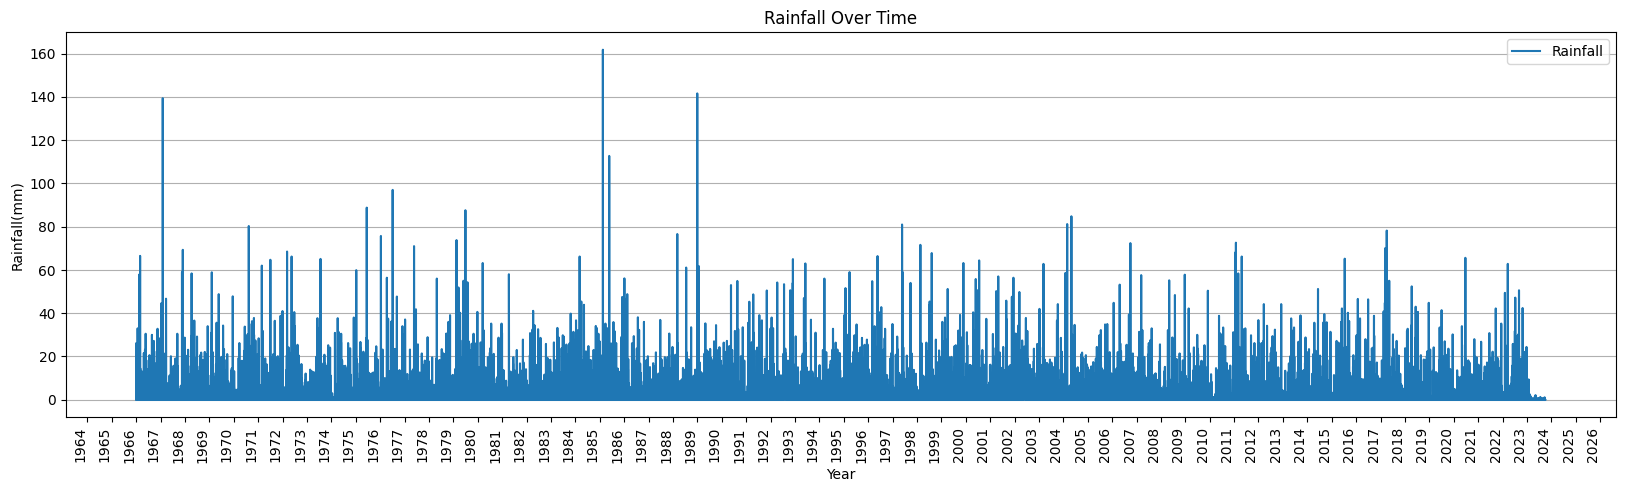

In [4]:
from matplotlib import dates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(auckland_rain['Date'], auckland_rain['Rainfall(mm)'], label='Rainfall')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.yaxis.grid(True)
# ax.xaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Year')
plt.ylabel('Rainfall(mm)')
plt.title('Rainfall Over Time')
plt.legend()
plt.show()

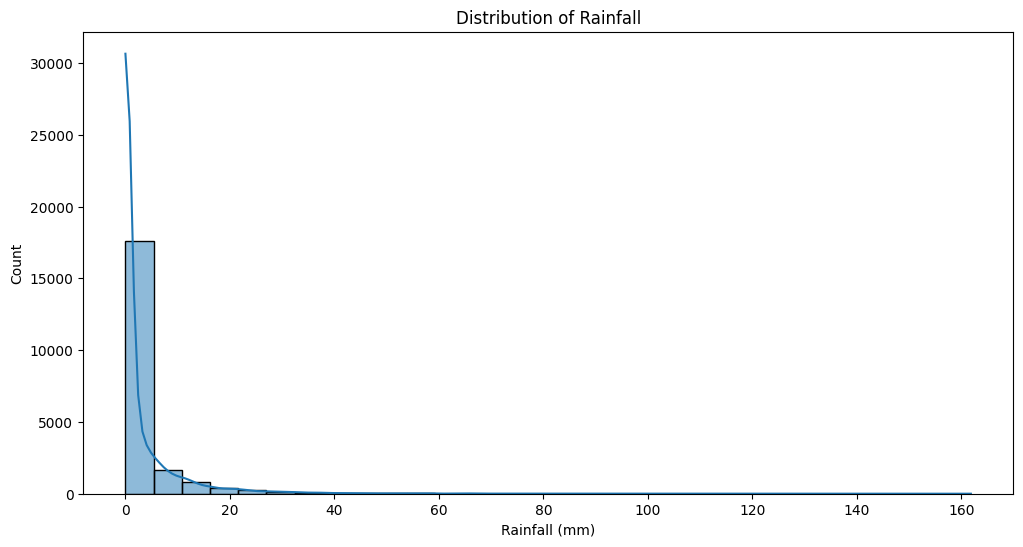

In [5]:
# Histograms
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=auckland_rain, x='Rainfall(mm)', bins=30, kde=True)
plt.xlabel('Rainfall (mm)')
plt.title('Distribution of Rainfall')
plt.show()

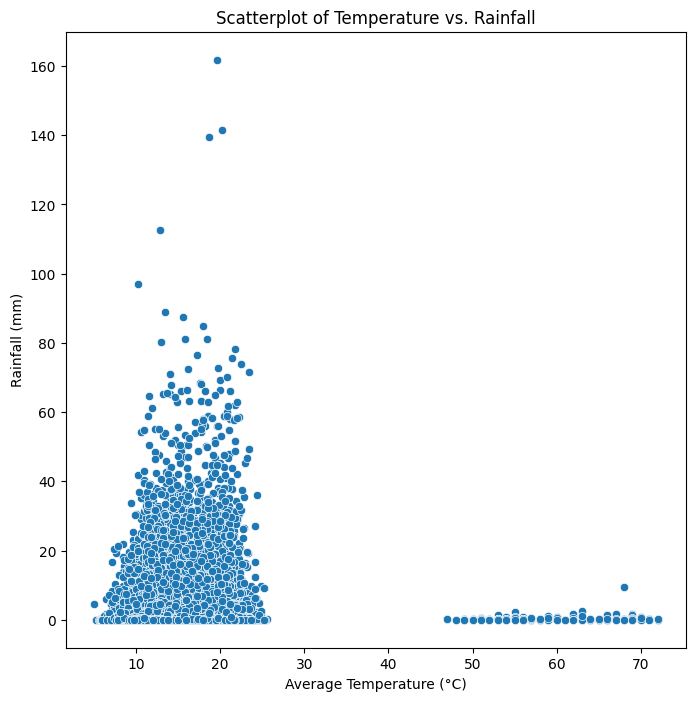

In [6]:
# Scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=auckland_rain, x='Tavg', y='Rainfall(mm)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatterplot of Temperature vs. Rainfall')
plt.show()

In [7]:
# Handling Missing Data
missing_data = auckland_rain.isnull().sum()
print(missing_data)

Date             0
Rainfall(mm)     0
Tavg             0
Tmax            37
Tmin            82
dtype: int64


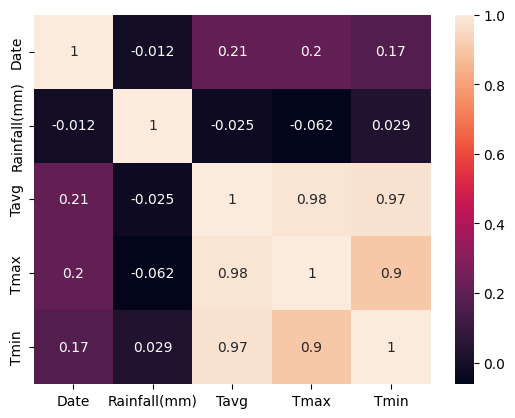

In [8]:
import seaborn as sns

weatherAuckland = auckland_rain.set_index('Date')
# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = auckland_rain.select_dtypes(include=[np.number])

plt.figure()
sns.heatmap(auckland_rain.corr(), annot=True)
plt.show()

In [9]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_days = 7
for i in range(1, lag_days + 1):
    auckland_rain[f'nextday_rainfall{i}'] = auckland_rain['Rainfall(mm)'].shift(i)
    auckland_rain[f'nextday_tavg{i}'] = auckland_rain['Tavg'].shift(i)
    auckland_rain[f'nextday_tmax{i}'] = auckland_rain['Tmax'].shift(i)
    auckland_rain[f'nextday_tmin{i}'] = auckland_rain['Tmin'].shift(i)

# Drop rows with NaN values due to lag features
auckland_rain.dropna(inplace=True)

auckland_rain.head(10)

,Date,Rainfall(mm),Tavg,Tmax,Tmin,nextday_rainfall1,nextday_tavg1,nextday_tmax1,nextday_tmin1,nextday_rainfall2,...,nextday_tmax5,nextday_tmin5,nextday_rainfall6,nextday_tavg6,nextday_tmax6,nextday_tmin6,nextday_rainfall7,nextday_tavg7,nextday_tmax7,nextday_tmin7
7,1966-01-08,1.3,19.7,22.1,17.3,5.1,20.0,23.7,16.3,8.9,...,23.5,17.1,26.2,20.5,23.9,17.1,0.0,18.0,22.2,13.9
8,1966-01-09,2.5,17.8,19.7,15.9,1.3,19.7,22.1,17.3,5.1,...,24.4,16.2,0.0,20.3,23.5,17.1,26.2,20.5,23.9,17.1
9,1966-01-10,0.0,16.2,18.0,14.4,2.5,17.8,19.7,15.9,1.3,...,23.4,17.8,0.0,20.3,24.4,16.2,0.0,20.3,23.5,17.1
10,1966-01-11,0.5,16.8,19.3,14.4,0.0,16.2,18.0,14.4,2.5,...,23.4,18.6,1.3,20.6,23.4,17.8,0.0,20.3,24.4,16.2
11,1966-01-12,0.5,18.0,20.5,15.6,0.5,16.8,19.3,14.4,0.0,...,23.7,16.3,8.9,21.0,23.4,18.6,1.3,20.6,23.4,17.8
12,1966-01-13,0.0,17.0,18.9,15.1,0.5,18.0,20.5,15.6,0.5,...,22.1,17.3,5.1,20.0,23.7,16.3,8.9,21.0,23.4,18.6
13,1966-01-14,0.5,16.8,18.7,14.9,0.0,17.0,18.9,15.1,0.5,...,19.7,15.9,1.3,19.7,22.1,17.3,5.1,20.0,23.7,16.3
14,1966-01-15,0.0,18.6,22.1,15.1,0.5,16.8,18.7,14.9,0.0,...,18.0,14.4,2.5,17.8,19.7,15.9,1.3,19.7,22.1,17.3
15,1966-01-16,0.0,18.8,24.6,12.9,0.0,18.6,22.1,15.1,0.5,...,19.3,14.4,0.0,16.2,18.0,14.4,2.5,17.8,19.7,15.9
16,1966-01-17,0.0,18.3,22.6,14.0,0.0,18.8,24.6,12.9,0.0,...,20.5,15.6,0.5,16.8,19.3,14.4,0.0,16.2,18.0,14.4


In [10]:
auckland_rain.columns

Index(['Date', 'Rainfall(mm)', 'Tavg', 'Tmax', 'Tmin', 'nextday_rainfall1',
       'nextday_tavg1', 'nextday_tmax1', 'nextday_tmin1', 'nextday_rainfall2',
       'nextday_tavg2', 'nextday_tmax2', 'nextday_tmin2', 'nextday_rainfall3',
       'nextday_tavg3', 'nextday_tmax3', 'nextday_tmin3', 'nextday_rainfall4',
       'nextday_tavg4', 'nextday_tmax4', 'nextday_tmin4', 'nextday_rainfall5',
       'nextday_tavg5', 'nextday_tmax5', 'nextday_tmin5', 'nextday_rainfall6',
       'nextday_tavg6', 'nextday_tmax6', 'nextday_tmin6', 'nextday_rainfall7',
       'nextday_tavg7', 'nextday_tmax7', 'nextday_tmin7'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

lag_features = [f'nextday_rainfall{i}' for i in range(1, lag_days + 1)] + \
                [f'nextday_tavg{i}' for i in range(1, lag_days + 1)] + \
                [f'nextday_tmax{i}' for i in range(1, lag_days + 1)] + \
                [f'nextday_tmin{i}' for i in range(1, lag_days + 1)]

# Split the data into features and target variable
auckland_rain.drop(columns='nextday_rainfall1')
X = auckland_rain[['Rainfall(mm)','Tavg', 'Tmax', 'Tmin'] + lag_features]

# Define the target variable (next day's rainfall)
y = auckland_rain['nextday_rainfall1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# XGBoost Model

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


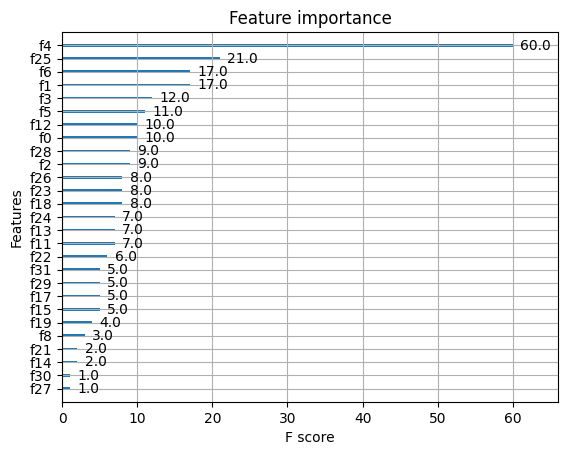

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [12]:
import xgboost as xgb
from xgboost import plot_importance

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


# Plot feature importance
plot_importance(xgb_model)
plt.show()


# Train the model on the selected features
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
xgb_predictions_train = xgb_model.predict(X_train_scaled)

# Make predictions on the test set
xgb_predictions_test = xgb_model.predict(X_test_scaled)

# Calculate RMSE for training set
rmse_train = sqrt(mean_squared_error(y_train, xgb_predictions_train))

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train, xgb_predictions_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, xgb_predictions_train)

# Calculate R2 score for training set
r2_train = r2_score(y_train, xgb_predictions_train)

# Print the metrics for the training set
print("XGBoost Training Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("R2 Score:", r2_train)

# Calculate RMSE for test set
rmse_test = sqrt(mean_squared_error(y_test, xgb_predictions_test))

# Calculate MAE for test set
mae_test = mean_absolute_error(y_test, xgb_predictions_test)

# Calculate MSE for test set
mse_test = mean_squared_error(y_test, xgb_predictions_test)

# Calculate R2 score for test set
r2_test = r2_score(y_test, xgb_predictions_test)

# Print the metrics for the test set
print("\nXGBoost Test Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("R2 Score:", r2_test)

XGBoost Training Set Metrics:
Root Mean Squared Error (RMSE): 6.989624026604787
Mean Absolute Error (MAE): 3.692028462245051
Mean Squared Error (MSE): 48.85484403329091
R2 Score: 0.08740088077797659

XGBoost Test Set Metrics:
Root Mean Squared Error (RMSE): 6.885814251936611
Mean Absolute Error (MAE): 3.606113437317544
Mean Squared Error (MSE): 47.414437912173355
R2 Score: 0.09101710640977256


In [14]:
# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

In [15]:
timestamp_column = 'Timestamp'

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_predictions_test}, index=X_test.index)

result_df[timestamp_column] = pd.to_datetime(result_df.index)
result_df.set_index(timestamp_column, inplace=True)

# Resample data to a monthly frequency
result_df_monthly = result_df.resample('M').mean()

# Calculate monthly median rainfall for predicted values
monthly_median_predicted = result_df_monthly['Predicted'].groupby(result_df_monthly.index.month).median()

# Calculate the percentage of predicted rainfall compared to the monthly median
result_df_monthly['rainfall_percentage_predicted'] = (
    result_df_monthly['Predicted'] / monthly_median_predicted[result_df_monthly.index.month].values
) * 100

# Apply the categorization function to create a new column with the weather condition for predicted values
result_df_monthly['weather_condition_predicted'] = result_df_monthly['rainfall_percentage_predicted'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions for predicted values
print(result_df_monthly[['Actual', 'Predicted', 'rainfall_percentage_predicted', 'weather_condition_predicted']])


              Actual  Predicted  rainfall_percentage_predicted  \
Timestamp                                                        
1970-01-31  2.873132   2.633716                          100.0   

           weather_condition_predicted  
Timestamp                               
1970-01-31                 Near normal  
